2-arms test

{
    "model_name": "bootstrapped_ucb.2023.05.15.17.14.24",
    "path": "/home/lorenzo/Desktop/mimic-2/log/mab/trace/att.lte.driving.2016.bootstrapped_ucb.2023.05.16.19.13.16.csv",
    "timestamp": "2023.05.16.19.13.16",
    "trace_name": "att.lte.driving.2016.bootstrapped_ucb.2023.05.16.19.13.16.csv"
},
{
    "model_name": "bootstrapped_ucb.2023.05.15.21.45.42",
    "path": "/home/lorenzo/Desktop/mimic-2/log/mab/trace/tm.lte.driving.bootstrapped_ucb.2023.05.17.11.48.42.csv",
    "timestamp": "2023.05.17.11.48.42",
    "trace_name": "tm.lte.driving.bootstrapped_ucb.2023.05.17.11.48.42.csv"
},
{
    "model_name": "bootstrapped_ucb.2023.05.16.04.52.08",
    "path": "/home/lorenzo/Desktop/mimic-2/log/mab/trace/vz.lte.driving.bootstrapped_ucb.2023.05.17.11.52.09.csv",
    "timestamp": "2023.05.17.11.52.09",
    "trace_name": "vz.lte.driving.bootstrapped_ucb.2023.05.17.11.52.09.csv"
},


3-arms test

{
    "model_name": "bootstrapped_ucb.2023.05.16.09.41.01",
    "path": "/home/lorenzo/Desktop/mimic-2/log/mab/trace/att.lte.driving.2016.bootstrapped_ucb.2023.05.17.12.16.00.csv",
    "timestamp": "2023.05.17.12.16.00",
    "trace_name": "att.lte.driving.2016.bootstrapped_ucb.2023.05.17.12.16.00.csv"
},
{
    "model_name": "bootstrapped_ucb.2023.05.16.11.28.01",
    "path": "/home/lorenzo/Desktop/mimic-2/log/mab/trace/tm.lte.driving.bootstrapped_ucb.2023.05.17.12.19.33.csv",
    "timestamp": "2023.05.17.12.19.33",
    "trace_name": "tm.lte.driving.bootstrapped_ucb.2023.05.17.12.19.33.csv"
},
{
    "model_name": "bootstrapped_ucb.2023.05.16.13.03.08",
    "path": "/home/lorenzo/Desktop/mimic-2/log/mab/trace/vz.lte.driving.bootstrapped_ucb.2023.05.17.12.27.15.csv",
    "timestamp": "2023.05.17.12.27.15",
    "trace_name": "vz.lte.driving.bootstrapped_ucb.2023.05.17.12.27.15.csv"
}

Native protocols

att.lte.driving.2016.cubic.2023.04.22.16.45.52
tm.lte.driving.cubic.2023.04.22.12.35.40
vz.lte.driving.cubic.2023.04.22.12.40.57

att.lte.driving.2016.bbr.2023.04.22.12.47.35
tm.lte.driving.bbr.2023.04.22.12.48.38
vz.lte.driving.bbr.2023.04.22.12.52.55

att.lte.driving.2016.hybla.2023.04.22.12.59.29
tm.lte.driving.hybla.2023.04.22.13.00.40
vz.lte.driving.hybla.2023.04.22.13.05.53

Plot to generate

2-arms vs 3-arms 

mean (or 95-perc) rtt vs throughput
rtt cdf
throughput cdf

(link capacity?)
kernel vs iperf data

In [5]:
import os
import sys
import json
sys.path.insert(0, os.path.abspath(os.path.join('', os.pardir)))
analysis_dir = os.path.abspath(os.path.join('', os.pardir))
sys.path.insert(0, os.path.abspath(os.path.join(analysis_dir, os.pardir)))
from utils.misc import read_json_file
from src.ml.helper.utils import parse_traces_config
import matplotlib.pyplot as plt

ml_dir: /home/lorenzo/Desktop/mimic-2/src/ml | src_dir: /home/lorenzo/Desktop/mimic-2/src | entry_dir: /home/lorenzo/Desktop/mimic-2 




In [13]:
iperf_path = "/home/lorenzo/Desktop/mimic-2/log/iperf"

#  Iperf traces
i_json_2_arms = {
    "att.lte.driving.2016": "att.lte.driving.2016.bootstrapped_ucb.2023.05.17.15.35.04.json",
    "tm.lte.driving": "tm.lte.driving.bootstrapped_ucb.2023.05.17.11.48.42.json",
    "vz.lte.driving": "vz.lte.driving.bootstrapped_ucb.2023.05.17.11.52.09.json"
}

i_json_3_arms = {
    "att.lte.driving.2016": "att.lte.driving.2016.bootstrapped_ucb.2023.05.17.12.16.00.json",
    "tm.lte.driving": "tm.lte.driving.bootstrapped_ucb.2023.05.17.12.19.33.json",
    "vz.lte.driving": "vz.lte.driving.bootstrapped_ucb.2023.05.17.12.27.15.json"
}

i_json_4_arms = {
    "att.lte.driving.2016": "att.lte.driving.2016.bootstrapped_ucb.2023.05.18.11.35.31.json",
    "tm.lte.driving": "tm.lte.driving.bootstrapped_ucb.2023.05.18.11.38.14.json",
    "vz.lte.driving": "vz.lte.driving.bootstrapped_ucb.2023.05.18.11.43.11.json"
}

In [7]:
# # Kernel metrics

# history_path = "/home/lorenzo/Desktop/mimic-2/log/mab/history"

# k_json_2_arms = {
#     "att.lte.driving.2016": "bootstrapped_ucb.2023.05.15.17.14.24.2023.05.16.19.13.16.json",
#     "tm.lte.driving": "bootstrapped_ucb.2023.05.15.21.45.42.2023.05.17.11.48.42.json",
#     "vz.lte.driving": "bootstrapped_ucb.2023.05.16.04.52.08.2023.05.17.11.52.09.json"
# }

# k_json_3_arms = {
#     "att.lte.driving.2016": "bootstrapped_ucb.2023.05.16.09.41.01.2023.05.17.12.16.00.json",
#     "tm.lte.driving": "bootstrapped_ucb.2023.05.16.11.28.01.2023.05.17.12.19.33.json",
#     "vz.lte.driving": "bootstrapped_ucb.2023.05.16.13.03.08.2023.05.17.12.27.15.json"
# }

In [8]:
# # Single protocol kernel metrics

# cubic_json = {
#     "att.lte.driving.2016": "test_cubic.2023.04.22.16.45.52.json",
#     "tm.lte.driving": "test_cubic.2023.04.22.12.35.40.json",
#     "vz.lte.driving": "test_cubic.2023.04.22.12.40.57.json"
# }

# bbr_json = {
#     "att.lte.driving.2016": "test_bbr.2023.04.22.12.47.35.json",
#     "tm.lte.driving": "test_bbr.2023.04.22.12.48.38.json",
#     "vz.lte.driving": "test_bbr.2023.04.22.12.52.55.json"
# }

# hybla_json = {
#     "att.lte.driving.2016": "test_hybla.2023.04.22.12.59.29.json",
#     "tm.lte.driving": "test_hybla.2023.04.22.13.00.40.json",
#     "vz.lte.driving": "test_hybla.2023.04.22.13.05.53.json"
# }

In [4]:
# Single protocol iperf metrics

i_cubic_json = {
    "att.lte.driving.2016": "att.lte.driving.2016.cubic.2023.04.22.18.09.38.json",
    "tm.lte.driving": "tm.lte.driving.cubic.2023.04.22.12.35.40.json",
    "vz.lte.driving": "vz.lte.driving.cubic.2023.04.22.12.40.57.json"
}

i_bbr_json = {
    "att.lte.driving.2016": "att.lte.driving.2016.bbr.2023.04.22.12.47.35.json",
    "tm.lte.driving": "tm.lte.driving.bbr.2023.04.22.12.48.38.json",
    "vz.lte.driving": "vz.lte.driving.bbr.2023.04.22.12.52.55.json"
}

i_hybla_json = {
    "att.lte.driving.2016": "att.lte.driving.2016.hybla.2023.04.22.12.59.29.json",
    "tm.lte.driving": "tm.lte.driving.hybla.2023.04.22.13.00.40.json",
    "vz.lte.driving": "vz.lte.driving.hybla.2023.04.22.13.05.53.json"
}

i_vegas_json = {
    "att.lte.driving.2016": "att.lte.driving.2016.vegas.2023.05.18.12.13.10.json",
    "tm.lte.driving": "tm.lte.driving.vegas.2023.05.18.12.14.22.json",
    "vz.lte.driving": "vz.lte.driving.vegas.2023.05.18.12.20.13.json"
}

In [9]:
def build_features_per_step(json_obj):
    step_array = {}

    for i, step_logs in enumerate(json_obj):
        step_array[i] = []
        for features_vector in step_logs["observation"]["features"]:
            step_array[i].append(features_vector)
    return step_array

def get_features(feature_vector):
    cwnd_values = []
    rtt_values = []
    thr_values = []
    for step in feature_vector.keys():
        for batch in feature_vector[step]:
            cwnd_values.append(batch[0])
            rtt_values.append(batch[1])
            thr_values.append(batch[8])
    return cwnd_values, rtt_values, thr_values

In [18]:
import numpy as np

traces = ["att.lte.driving.2016", "tm.lte.driving", "vz.lte.driving"]
model = "bootstrapped_ucb"
# k_json_dict_2 = {}
# k_json_dict_3 = {}
i_json_dict_2 = {}
i_json_dict_3 = {}
i_json_dict_4 = {}
# single_prot_dict = {}
i_single_prot_dict = {}

for t in traces:
    i_json_dict_2[t] = read_json_file(os.path.join(iperf_path, i_json_2_arms[t]))

for t in traces:
    i_json_dict_3[t] = read_json_file(os.path.join(iperf_path, i_json_3_arms[t]))

for t in traces:
    i_json_dict_4[t] = read_json_file(os.path.join(iperf_path, i_json_4_arms[t]))
    
# for t in traces:
#     k_json_dict_2[t] = []
#     with open(os.path.join(history_path, k_json_2_arms[t]), 'r') as f1:
#         for line in f1:
#             k_json_dict_2[t].append(json.loads(line))

#     k_json_dict_3[t] = []
#     with open(os.path.join(history_path, k_json_3_arms[t]), 'r') as f2:
#         for line in f2:
#             k_json_dict_3[t].append(json.loads(line))

#  for kernel
# for p in ["cubic", "bbr", "hybla"]:
#     if p == "cubic":
#         p_json = cubic_json
#     elif p == "bbr":
#         p_json = bbr_json
#     else:
#         p_json = hybla_json
#     for t in traces:
#         single_prot_dict[(p, t)] = []
#         with open(os.path.join(history_path, p_json[t]), 'r') as f3:
#             for line in f3:
#                 single_prot_dict[(p,t)].append(json.loads(line)) 

# for iperf
for p in ["cubic", "bbr", "hybla", "vegas"]:
    if p == "cubic":
        p_json = i_cubic_json
    elif p == "bbr":
        p_json = i_bbr_json
    elif p == "hybla":
        p_json = i_hybla_json
    elif p == "vegas":
        p_json = i_vegas_json
    for t in traces:
        i_single_prot_dict[(p, t)] = read_json_file(os.path.join(iperf_path, p_json[t]))

METRICS FROM KERNEL

In [ ]:
# import numpy as np

# # Get the features batch for each step
# save = False
# for t in traces:
#     # Plot native

#     for p in ["cubic", "bbr", "hybla"]:
#         s_arr_p = build_features_per_step(single_prot_dict[(p, t)])
#         cwnd_values, rtt_values, thr_values = get_features(s_arr_p)
#         # delay_95_perc = sum(rtt_values)/len(rtt_values)
#         delay_95_perc_p = np.percentile(rtt_values, 95)
#         avg_thr_p = sum(thr_values)/len(thr_values)
#         print(delay_95_perc_p, avg_thr_p)
#         plt.plot(delay_95_perc_p, avg_thr_p, marker='X', label=p)

#     # Plot mimic different arms
#     for n_arms in [2, 3]:
        
#         if n_arms == 2:
#             k_dict = k_json_dict_2
#         elif n_arms == 3:
#             k_dict = k_json_dict_3

#         s_arr = build_features_per_step(k_dict[t])
#         cwnd_values, rtt_values, thr_values = get_features(s_arr)
#         # delay_95_perc = sum(rtt_values)/len(rtt_values)
#         delay_95_perc = np.percentile(rtt_values, 95)
#         # avg_thr = sum(thr_values)/len(thr_values)
#         thr_95_perc = np.percentile(thr_values, 95)
#         print(delay_95_perc, thr_95_perc)

#         plt.plot(delay_95_perc, thr_95_perc, marker='X', label=f"{n_arms} arms")

#     plt.title(t)
#     plt.xlabel('95-percentile Delay (ms)')
#     plt.ylabel('Throughput')
#     plt.grid(linestyle='--', linewidth=0.2)
#     plt.legend()
#     if save:
#         filename = "marginal_gain_rtt_vs_thru.png"
#         plt.savefig(f"/home/lorenzo/Desktop/mimic-2/analysis/plots/thr_trends/{filename}")
#     plt.show()

METRICS FROM IPERF

In [22]:
def get_metrics(config):
    rtts = []
    cwnds = [] 
    s_rate = []
    for intervals in config['intervals']:
        s_rate.append(intervals['streams'][0]['bits_per_second']*10**(-6))
        cwnds.append(intervals['streams'][0]['snd_cwnd'])
        rtts.append(intervals['streams'][0]['rtt']*10**(-3))
    thruput = config["end"]["streams"][0]["receiver"]["bits_per_second"]*10**(-6)
    return thruput, rtts, cwnds, s_rate

In [10]:
# # Get metrics from config files

# protocols = ['mimic', 'cubic', 'bbr', 'hybla']
# i_thruputs_2, i_rtts_2, i_cwnds_2 = {}, {}, {}
# metrics = []
# for trace in traces:
#     i_thruputs_2[t], i_rtts_2[t], i_cwnds_2[t] = get_metrics(i_json_dict_2[t])

10805.106399999999 2.133564481369
594.1141499999998 1.759766178849
11069.214399999999 2.140203802627
9535.241399999999 2.0339230248869997
783.2215499999995 1.742171578923
7280.550949999996 1.8041340949359999
7280.550949999996 1.8041340949359999


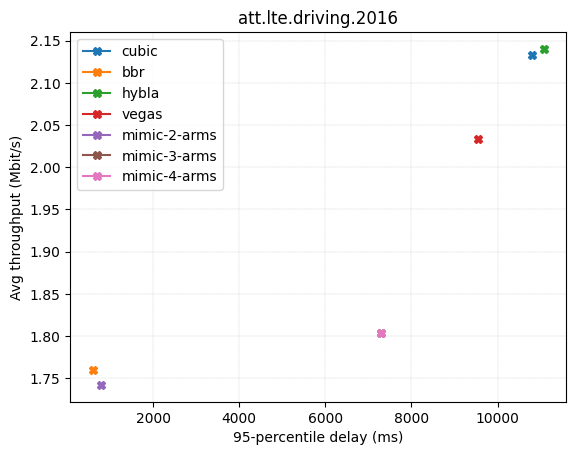

907.8984 29.778377858042
49.24255 23.03897928392
1033.24415 30.252673428810997
907.90585 29.839672211633996
326.36474999999984 25.1514475016
680.5364999999996 26.157358330648
680.5364999999996 26.157358330648


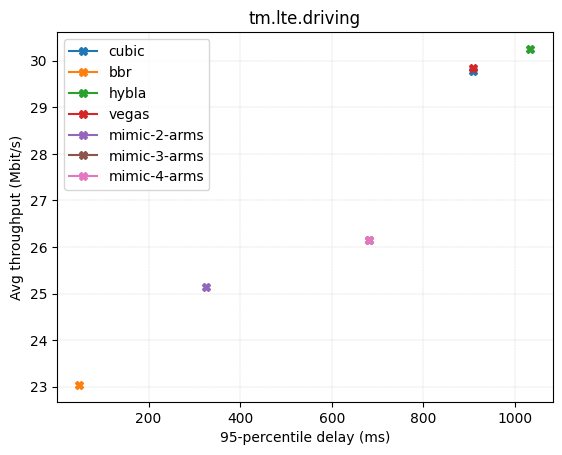

4798.636899999999 7.521605487443
92.95339999999997 6.951583747867999
5931.918499999997 7.616630735748
4746.705649999998 7.515192575671
950.8784499999999 7.083746858966
1822.78925 7.1462363018329995
1822.78925 7.1462363018329995


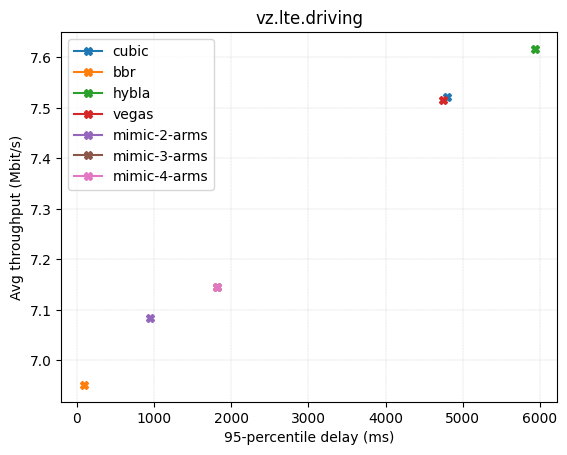

In [23]:
import numpy as np

all_traces = parse_traces_config()
all_traces = [t for t in all_traces['traces'].keys()]

# Get the features batch for each step
save = False
for t in traces:
    # Plot native

    for p in ["cubic", "bbr", "hybla", "vegas"]:
        thruput, rtts, cwnds, _ = get_metrics(i_single_prot_dict[(p, t)])
        # thr_95_perc = np.mean(thruputs)
        delay_95_perc = np.percentile(rtts, 95)
        print(delay_95_perc, thruput)
        plt.plot(delay_95_perc, thruput, marker='X', label=p)


    # Plot mimic different arms
    for n_arms in [2, 3, 4]:
        if n_arms == 2:
            i_dict = i_json_dict_2
        elif n_arms == 3:
            i_dict = i_json_dict_3
        elif n_arms == 4:
            i_dict = i_json_dict_4

        thruput, rtts, cwnds, _ = get_metrics(i_dict[t])
        # thr_95_perc = np.mean(thruputs)
        delay_95_perc = np.percentile(rtts, 95)
        print(delay_95_perc, thruput)
        plt.plot(delay_95_perc, thruput, marker='X', label=f"mimic-{n_arms}-arms")

    plt.title(t)
    plt.xlabel('95-percentile delay (ms)')
    plt.ylabel('Avg throughput (Mbit/s)')
    plt.grid(linestyle='--', linewidth=0.2)
    plt.legend()
    if save:
        filename = f"bootstrapped_ucb.{t}.w_native_protocols.png"
        path = "/home/lorenzo/Desktop/mimic-2/analysis/plots/marginal_gains/"
        os.makedirs(path, exist_ok=True)
        plt.savefig(os.path.join(path, f"{filename}"))
    plt.show()

In [33]:
def cdf(x):
    N = len(x)

    # sort the data in ascending order
    x = np.sort(x)
    
    # get the cdf values of y
    y = np.arange(N) / float(N)

    return (x, y)

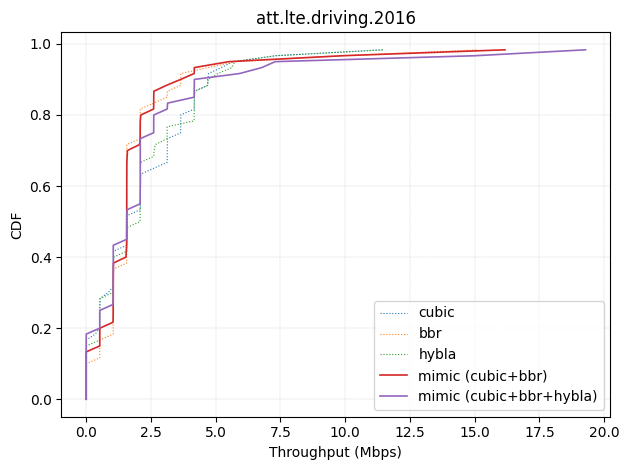

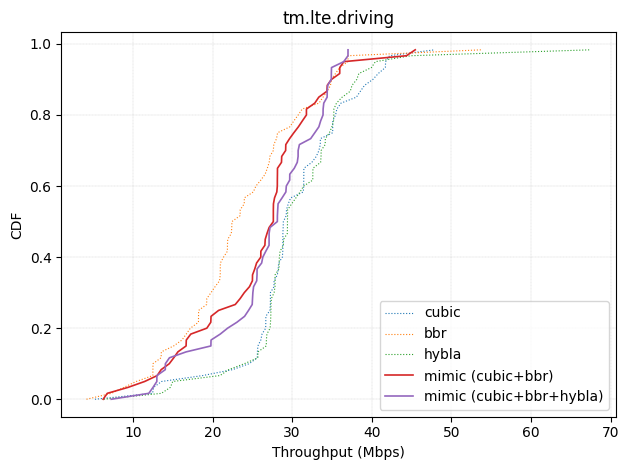

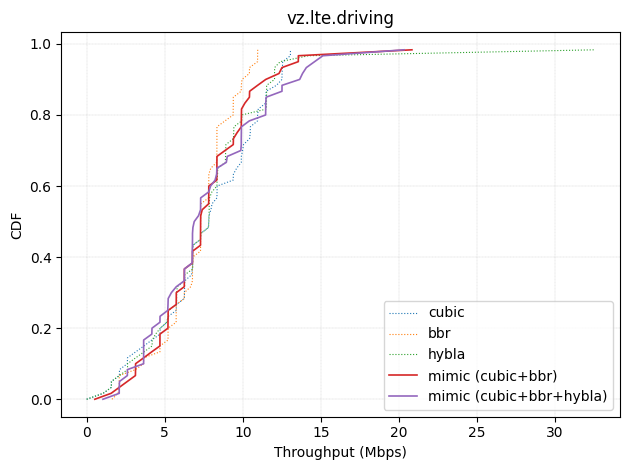

In [76]:
# CDFS
protocols = ["cubic", "bbr", "hybla"]
save = True
for t in traces:
    plt.figure()
    for p in protocols:
        thruput, rtts, cwnds, s_rate = get_metrics(i_single_prot_dict[p, t])
        (t_x, t_y) = cdf(s_rate)
        (r_x, r_y) = cdf(rtts)
        (c_x, c_y) = cdf(cwnds)
        plt.plot(t_x, t_y, label=p, linewidth=0.8, linestyle="dotted")

    # plt.subplot(1, 3, 1)
    
    # Plot mimic different arms
    for n_arms in [2, 3]:
        if n_arms == 2:
            i_dict = i_json_dict_2
        elif n_arms == 3:
            i_dict = i_json_dict_3

        thruput, rtts, cwnds, s_rate = get_metrics(i_dict[t])
        (t_x_2, t_y_2) = cdf(s_rate)
        (r_x_2, r_y_2) = cdf(rtts)
        (c_x_2, c_y_2) = cdf(cwnds)

        plt.plot(t_x_2, t_y_2, label="mimic (cubic+bbr)" if n_arms==2 else "mimic (cubic+bbr+hybla)",
                  linewidth=1.2)
        
        # plt.subplot(1, 3, 2)
        # plt.plot(r_x, r_y, label=p)
        # plt.xlabel('RTT (ms)')
        # plt.ylabel('CDF')
        # plt.title(t)
        # plt.legend()
      
        # plt.subplot(1, 3, 3)
        # plt.plot(c_x, c_y, label=p)
        # plt.xlabel('Cwnd (Byte)')
        # plt.ylabel('CDF')
        # plt.title(t)
        # plt.legend()
      

    # Show the plot
    plt.xlabel('Throughput (Mbps)')
    plt.ylabel('CDF')
    plt.title(t)
    plt.legend()
    plt.grid(linestyle='--', linewidth=0.2)
    plt.tight_layout()
    if save:
        filename = f"bootstrapped_ucb.{t}.thruput_cdf.png"
        path = "/home/lorenzo/Desktop/mimic-2/analysis/plots/marginal_gains/"
        os.makedirs(path, exist_ok=True)
        plt.savefig(os.path.join(path, f"{filename}"))
    plt.show()


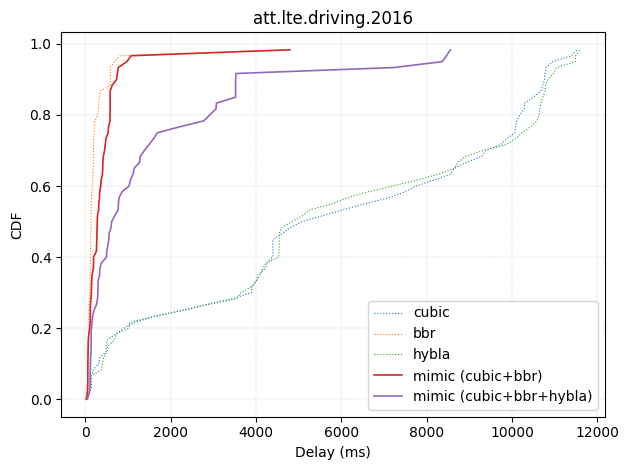

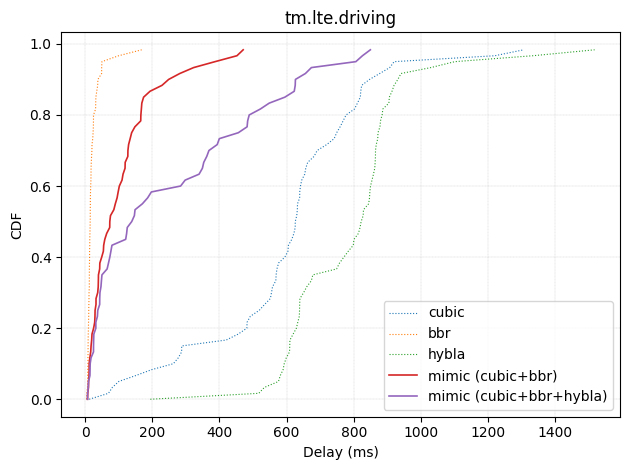

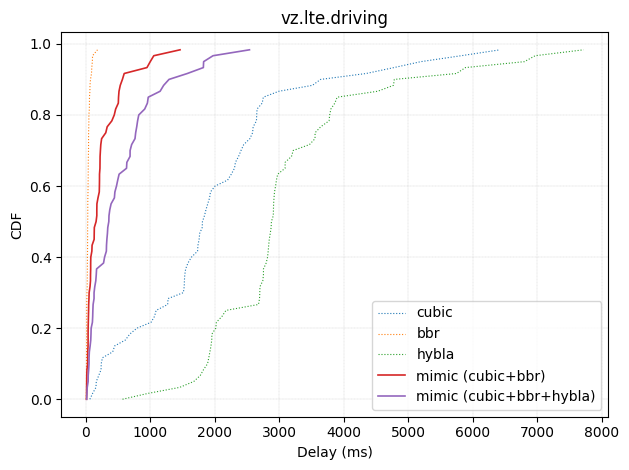

In [74]:
# CDFS
protocols = ["cubic", "bbr", "hybla"]
save = True
for t in traces:
    plt.figure()
    for p in protocols:
        thruput, rtts, cwnds, s_rate = get_metrics(i_single_prot_dict[p, t])
        # (t_x, t_y) = cdf(s_rate)
        (r_x, r_y) = cdf(rtts)
        # (c_x, c_y) = cdf(cwnds)
        plt.plot(r_x, r_y, label=p, linewidth=0.8, linestyle="dotted")

    # plt.subplot(1, 3, 1)
    
    # Plot mimic different arms
    for n_arms in [2, 3]:
        if n_arms == 2:
            i_dict = i_json_dict_2
        elif n_arms == 3:
            i_dict = i_json_dict_3

        thruput, rtts, cwnds, s_rate = get_metrics(i_dict[t])
        # (t_x_2, t_y_2) = cdf(s_rate)
        (r_x_2, r_y_2) = cdf(rtts)
        # (c_x_2, c_y_2) = cdf(cwnds)

        plt.plot(r_x_2, r_y_2, label="mimic (cubic+bbr)" if n_arms==2 else "mimic (cubic+bbr+hybla)",
                  linewidth=1.2)
        
        # plt.subplot(1, 3, 2)
        # plt.plot(r_x, r_y, label=p)
        # plt.xlabel('RTT (ms)')
        # plt.ylabel('CDF')
        # plt.title(t)
        # plt.legend()
      
        # plt.subplot(1, 3, 3)
        # plt.plot(c_x, c_y, label=p)
        # plt.xlabel('Cwnd (Byte)')
        # plt.ylabel('CDF')
        # plt.title(t)
        # plt.legend()
      

    # Show the plot
    plt.xlabel('Delay (ms)')
    plt.ylabel('CDF')
    plt.title(t)
    plt.legend()
    plt.grid(linestyle='--', linewidth=0.2)
    plt.tight_layout()
    if save:
        filename = f"bootstrapped_ucb.{t}.delay_cdf.png"
        path = "/home/lorenzo/Desktop/mimic-2/analysis/plots/marginal_gains/"
        os.makedirs(path, exist_ok=True)
        plt.savefig(os.path.join(path, f"{filename}"))
    plt.show()


